# Анализ изменения цены лечения в медицинской клинике 

<div style="border:solid blue 2px; padding: 20px">
    
* **ФИО**: Стриж Наталья Валентиновна</br>
* **Telegram**: https://t.me/natashaneteli </br>
* **Презентация**: https://disk.yandex.ru/i/TytVrbWRwKorsQ

Перед нами данные медицинского центра. Необходимо провести анализ изменения цены лечения в медицинской клинике в 2022 году относительно 2021 года и определить ключевые драйверы изменения цены лечения. 

**План**
1. [Загрузка данных и изучение общей информации.](#section_id_1)</br>

2. [Предобработка данных.](#section_id_2)</br>

* 2.1 Работа с типом данных.</br>
* 2.2. Работа с пропусками.</br>
* 2.3. Работа с дубликатами.</br>
* 2.4. Работа с аномальными значениями.</br>
* 2.5. Добавление столбов месяца и года обслуживания.</br>
* 2.6. Разделение датафрейма на 2 по году.</br>

3. [Исследовательский анализ данных.](#section_id_3)</br>

* 3.1. Анализ посещений.</br>
* 3.2. Анализ по возрасту.</br>
* 3.3. Анализ распределения услуг.</br>
* 3.4. Анализ по полу.</br>
* 3.5. Анализ стабильности пациентов.</br>
* 3.6. Анализ прибыли.</br>
* 3.7. Анализ по лечениям.</br>

4. [Проверка гипотез.](#section_id_4)</br>

* 4.1. Подорожание услуг.</br>
* 4.2. Возраст и количество используемых услуг.</br>
* 4.3. Количество лечений на пациента.</br>

5. [Общий вывод.](#section_id_5)</br>

**Описание данных.** </br>

* `record_id` - уникальный идентификатор строки данных;</br>
* `service_date` - дата оказания медицинской услуги;</br>
* `service_name` - наименование медицинской услуги;</br>
* `service_number` - количество услуг;</br>
* `service_amount` - сумма выплат (стоимость оказанных услуг в рублях);</br>
* `insured` - уникальный идентификатор пациента;</br>
* `sex_id` - пол пациента;</br>
* `age_for_service_date` - возраст пациента</br>

## 1. Загрузка данных и изучение общей информации.<a id='section_id_1'></a>

In [123]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from scipy import stats
from scipy.stats import mannwhitneyu
import warnings

In [124]:
# чтение данных
data = pd.read_excel('data_test_task_2022.xlsx')

In [125]:
# вывод первых 5 строк таблицы
data.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26


In [126]:
# описание данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


<div style="border:solid blue 2px; padding: 20px">
    
**Вывод по пункту.**</br>
Перед нами 85 тысяч строк. Необходимо произвести обработку данных и изменить некоторые типы данных.

## 2. Предобработка данных.<a id='section_id_2'></a>

### 2.1. Работа с типом данных.

In [127]:
# Изменим тип данных `service_date` на datetime
data['service_date'] = pd.to_datetime(data['service_date'])

### 2.2. Работа с пропусками.

In [128]:
data.isna().mean()

record_id               0.000000
service_date            0.000000
service_name            0.000000
service_amount          0.000000
service_number          0.000000
insured                 0.000000
sex_id                  0.000246
age_for_service_date    0.000000
dtype: float64

In [129]:
print('Процент пропусков в графе пол пациента:',
      round((data['sex_id'].isna().sum()/data['sex_id'].count())*100, 3), '%')

Процент пропусков в графе пол пациента: 0.025 %


Мы имеем пропуски только в одной категории данных - пол клиентов. Малость процента пропусков позволяет оставить их нетронутыми.

### 2.3. Работа с дубликатами.

In [130]:
# Cчитаем количество дубликатов в данных
data.duplicated().sum()

0

Проверим условие: число `record_id` должно быть равно размеру таблицы.

In [131]:
print('Количество уникальных значений record_id:', data['record_id'].nunique())
print('Размер датафрейма:', data.shape[0])

Количество уникальных значений record_id: 85369
Размер датафрейма: 85369


### 2.4. Работа с аномальными значениями.

#### **`service_number` - количество услуг**

In [132]:
# вывод уникальных значений service_number
data['service_number'].unique()

array([ 1,  2,  3,  4, 12,  5, 11, 13,  7,  6, 16, 15, 14])

Есть большие значения, посмотрим на них в таблице.

In [133]:
# вывод значений service_number более 13
data[data['service_number'] > 13]['service_name']

36313    Постановка кожных аллергопроб (за 1 единицу)
37567    Постановка кожных аллергопроб (за 1 единицу)
48871    Постановка кожных аллергопроб (за 1 единицу)
73042    Постановка кожных аллергопроб (за 1 единицу)
83447    Постановка кожных аллергопроб (за 1 единицу)
Name: service_name, dtype: object

Постановка кожных аллергопроб требует большого количества едениц, так как существует много аллергенов. Аномалий не обнаружено.

#### **`age_for_service_date` - возраст пациентов**

count    85369.000000
mean        33.851691
std         12.144646
min          0.000000
25%         27.000000
50%         34.000000
75%         41.000000
max         83.000000
Name: age_for_service_date, dtype: float64

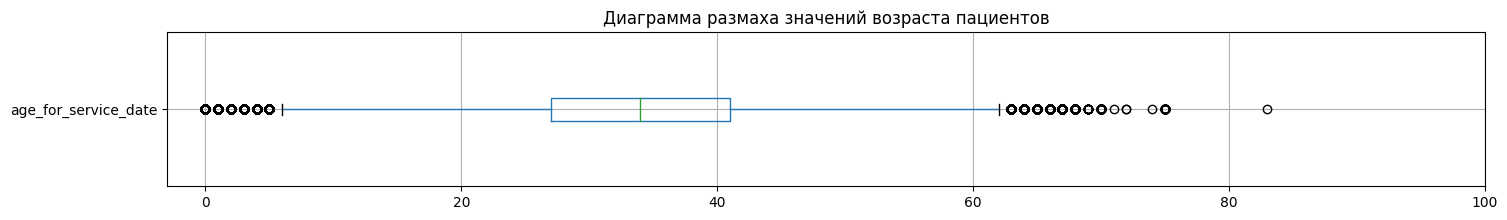

In [134]:
# задаём размер диаграммы
fig, ax = plt.subplots(figsize = (17,2))

# построение
ax = data[['age_for_service_date']].boxplot(vert = False, ax =ax)

# заголовок и ось
ax.set_title('Диаграмма размаха значений возраста пациентов')
ax.set_xlim(-3, 100)

# статистические характеристики возраста
data['age_for_service_date'].describe()

In [135]:
print('Количество младенцев:', len(data[data['age_for_service_date'] == 0]))
print('Количество детей от года до 10 лет:', len(data.query('age_for_service_date >= 1 and age_for_service_date < 10')))
print('Количество пожилых людей:', len(data[data['age_for_service_date'] > 60]))

Количество младенцев: 402
Количество детей от года до 10 лет: 4635
Количество пожилых людей: 1604


Медиана возраста - 34 года, среднее - 33,8. В датафрейме есть как младенцы, так и пожилые люди старше 70 лет.

#### **`service_amount` - стоимость услуги**

count    85369.000000
mean      1166.094636
std        799.062660
min        147.000000
25%        550.000000
50%       1155.000000
75%       1530.000000
max      26999.000000
Name: service_amount, dtype: float64

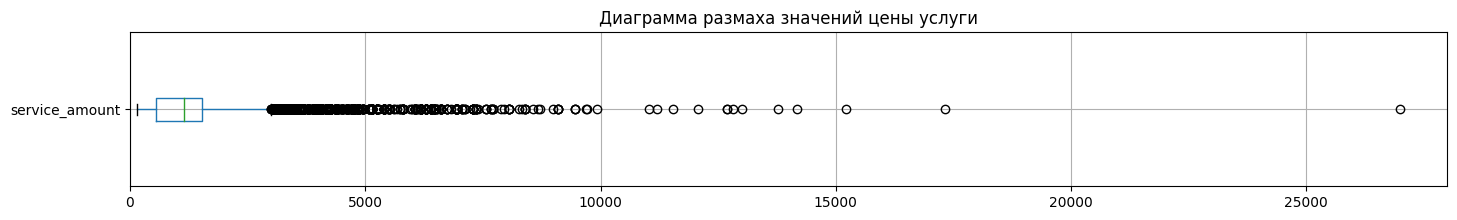

In [136]:
# задаём размер диаграммы
fig, ax = plt.subplots(figsize = (17,2))

# построение
ax = data[['service_amount']].boxplot(vert = False, ax =ax)

# заголовок и ось
ax.set_title('Диаграмма размаха значений цены услуги')
ax.set_xlim(0, 28000)

# статистические характеристики стоисости услуг
data['service_amount'].describe()

In [137]:
# Посмотрим на дорогостоящие услуги
data[data['service_amount'] > 15000]

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
15588,30961493203,2021-06-17,МРТ брюшной полости и забрюшинного пространств...,17325,1,634755,1.0,41
18519,30961787103,2021-06-24,"гистерорезектоскопия при полипах , РДВ",26999,1,362928,2.0,51
23794,31249334503,2021-08-20,МРТ головного мозга и гипофиза с контрастирова...,15225,1,544627,2.0,34


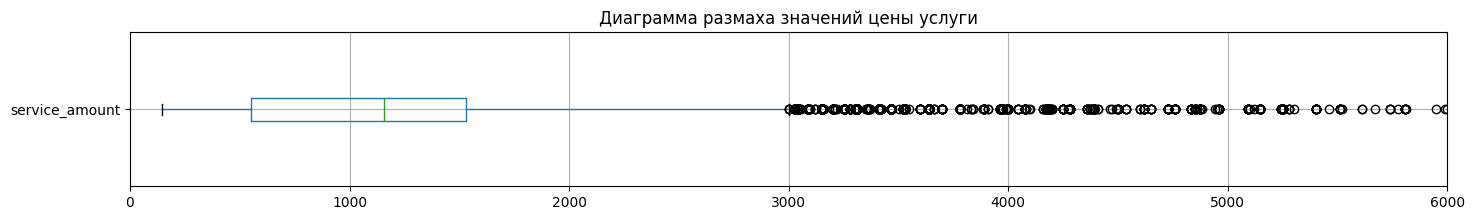

In [138]:
# Приблизим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['service_amount']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений цены услуги')
ax.set_xlim(0, 6000);

In [139]:
# Посчитаем количество и процент услуг дороже 3.000 рублей
print('Количество строк таблицы с суммой чека более 3.000 руб.:', len(data[data['service_amount'] > 3000]))
print('Процент', round(len(data[data['service_amount'] > 3000])/data.shape[0]*100, 2), '%')

Количество строк таблицы с суммой чека более 3.000 руб.: 2720
Процент 3.19 %


Не будем удалять большие значения чеков, но учтём это в анализе и при необходимости будем строить дополнительные графики с чеками до 3.000 руб.

### 2.5. Добавление столбцов года и месяца обслуживания

In [140]:
# добавляем столбец года
data['year'] = data['service_date'].dt.year

In [141]:
# добавляем столбец месяца
data['month'] = pd.DatetimeIndex(data['service_date']).month

### 2.6. Разделение датафрейма на 2 по году

Для удобства работы создадим 2 датафрейма data_2021 и data_2022, которые будут хванить данные за соответствующие года.

In [142]:
# вводим два новых датафрейма по году
data_2021 = data[data['year'] == 2021]
data_2022 = data[data['year'] == 2022]

# описание размеров датафреймов
print('Размер датафрейма 2021:', len(data_2021))
print('Размер датафрейма 2022:', len(data_2022))
print('Размер общего датафрейма:', len(data))

# определение минимальной и максимальной даты приёма
print('Минимальная дата приёма:', data['service_date'].min())
print('Максимальная дата приёма:', data['service_date'].max())

Размер датафрейма 2021: 44392
Размер датафрейма 2022: 40977
Размер общего датафрейма: 85369
Минимальная дата приёма: 2021-01-03 00:00:00
Максимальная дата приёма: 2022-08-31 00:00:00


За 2021 год мы имеет 44.392 строк таблицы и 12 месяцев. За 2022 год - 40.997 строк таблицы и 8 месяцев. Различие в количестве месяцев может дать значительный вклад в анализ, поэтому в исследовательском анализе ограничим датафрейм 2021 года до 8 месяцев.

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод по пункту.**</br>
* Тип данных `service_date` изменён с object на datetime.
* Процент пропуков в категории данных `sex_id` - 0.025%.
* Дубликатов в данных не обраружено.
* Количество уникальных значений `record_id` равно размеру таблицы.
* Минимальное количество `service_number` - 1, максимальное - 15. Большое количество услуг на пациента наблюдается в процедурах на постановку кожных алергопроб.
* Минимальный возраст пациентов - младенцы, максимальный - 83 года. Медиана возраста 34 года, среднее - 33,8 лет.
* Минимальный чек пациента - 147 руб., максимальный - 26.999 руб. Процедуры в большим чеком приходятся на МРТ анализ различных областей. Основная часть чеков лежит в пределах 3.000 руб.
* В датафрейм добавлены столбцы года и месяца предоставления услуги.
* Введено 2 датафрейма по году оказания услуги.

## 3. Исследовательский анализ данных.<a id='section_id_3'></a>

### 3.1. Анализ посещений.

#### Количество записей в таблице по дням

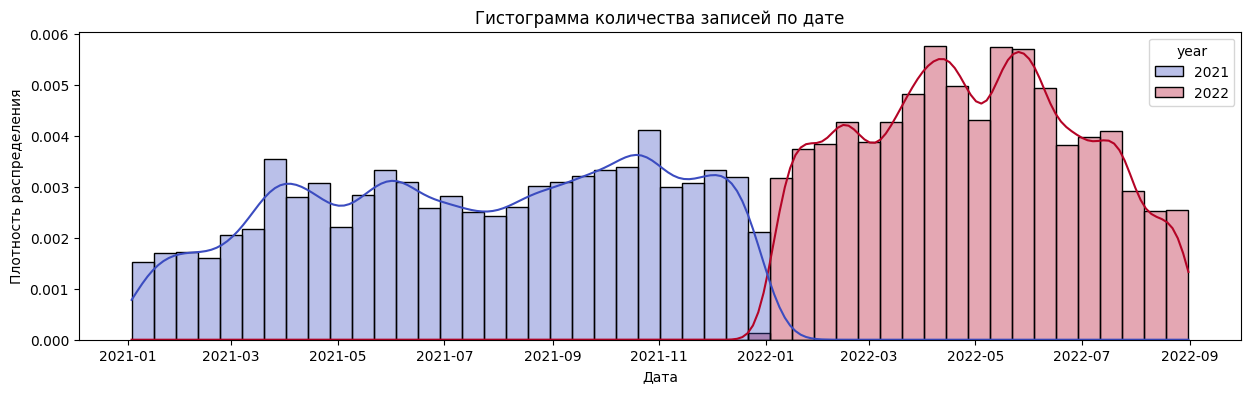

In [143]:
# задаём размер
plt.figure(figsize=(15, 4))

# построение
sns.histplot(data=data, x='service_date', palette ="coolwarm", hue='year', stat='density', common_norm=False, 
             alpha=.35, kde=True)

# заголовок и оси
plt.title('Гистограмма количества записей по дате')
plt.xlabel('Дата')
plt.ylabel('Плотность распределения');

Гистограмма показывает число записей посещений в день. По графику видно, что в 2022 году резко возросло количество посещений. При наличии полных данных за 2022 год картина всех признаков была бы иная, поэтому целесообразнее ограничить данные 2021 года до августа и продолжить анализ на новых данных.

#### Количества уникальных посетителей по дням

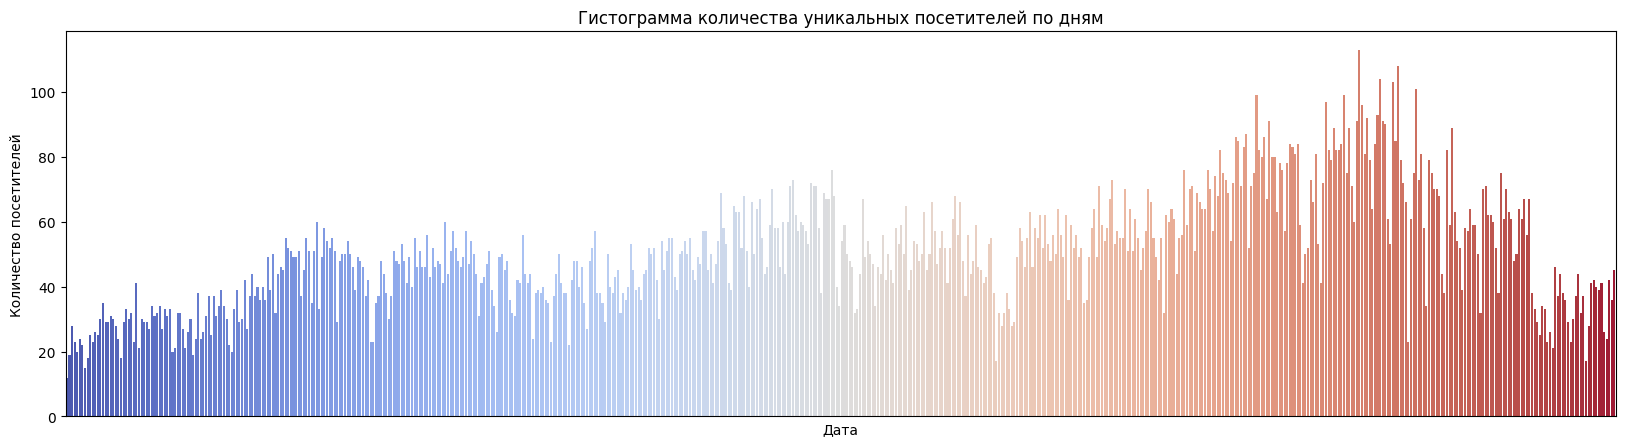

In [144]:
# гистограмма количества уникальных посетителей по дням
# Создание нового датафрейма с уникальными датами и количеством уникальных посетителей
df_unique = data.groupby(data['service_date'].dt.date)['insured'].nunique().reset_index()

# задаём размер диаграммы
plt.figure(figsize=(20, 5))

# построение
sns.barplot(data=df_unique, x='service_date', y='insured', palette ="coolwarm")

# заголовок и оси
plt.title('Гистограмма количества уникальных посетителей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество посетителей')

# убираем значения по оси х
plt.xticks([]);

Распределение повторяет вид предыдущего. По графику видно, что в целом посетителей в 2022 году стало больше.

#### Дневной чек клиники

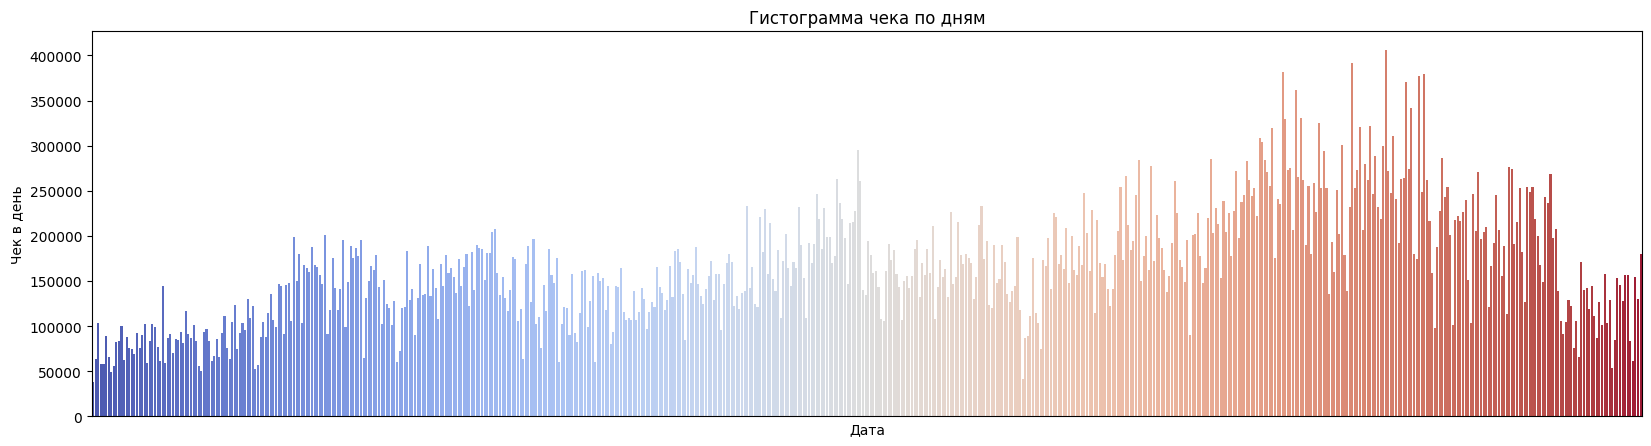

In [145]:
# гистограмма количества уникальных посетителей по дням
# Создание нового датафрейма с уникальными датами и количеством уникальных посетителей
df_average_bill = data.groupby('service_date')['service_amount'].sum().reset_index()

# задаём размер диаграммы
plt.figure(figsize=(20, 5))

# построение
sns.barplot(data=df_average_bill, x='service_date', y='service_amount', palette ="coolwarm")

# заголовок и оси
plt.title('Гистограмма чека по дням')
plt.xlabel('Дата')
plt.ylabel('Чек в день')

# убираем значения по оси х
plt.xticks([]);

График показывает идентичную законометрость графику по количеству клиентов в день. То есть дневной чек напрямую зависит от количества клиентов в день.

In [146]:
# создаём датафрейм который обрежет 2021 год до сентября
data_2021_8 = data_2021[data_2021['month'] < 9]

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод по пункту.**</br>
* Гистограмма количества записей в день показывает значительный рост записей в 2022 году.
* Аналогичные результаты показывает гистограмма количества посетителей в день.
* Выявлено, что суммарный чек в день напрямую зависит от количества уникальных клиентов в день.
* Принято решение ограничить данные 2021 года до 8 месяцев. Далее мы будем сравнивать 8 месяцев 2021 года и 8 месяцев 2022 года.

### 3.2. Анализ по возрасту.

#### Распределение возрастов пациентов

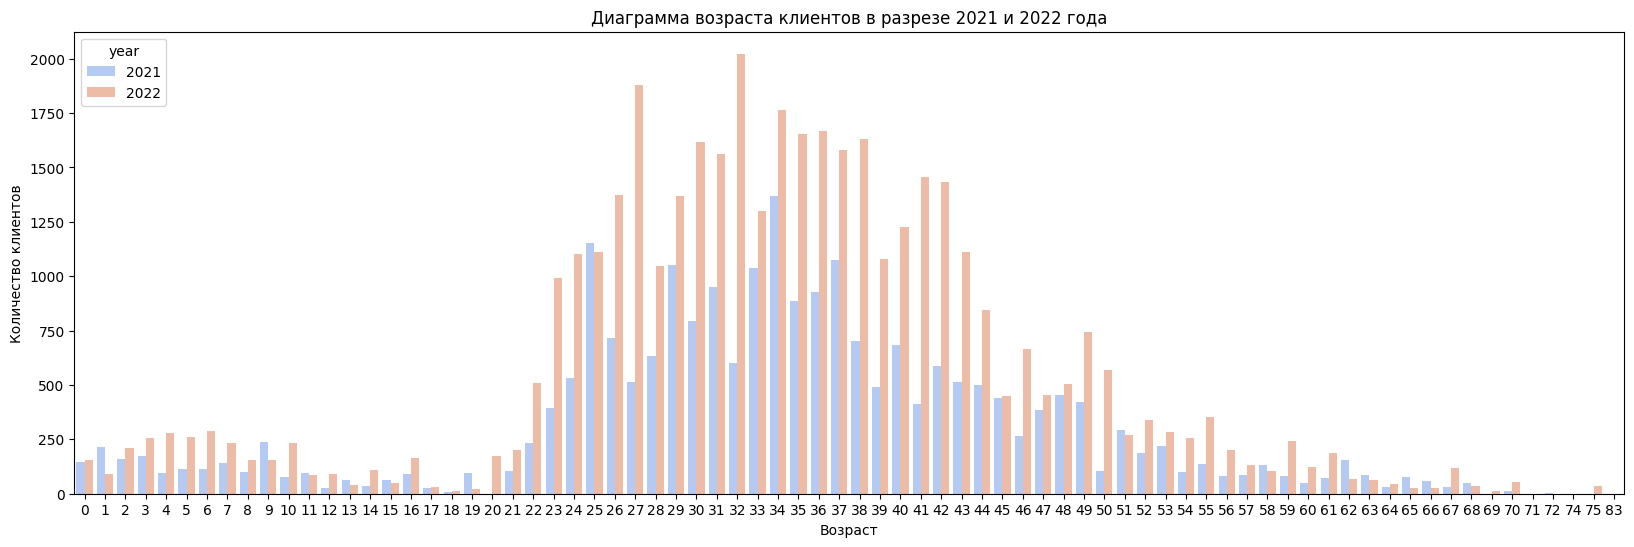

In [147]:
# задаём размер
plt.figure(figsize=(20, 6))

# построение
sns.countplot(data=data.query('year == 2021 and month < 8 or year == 2022'), x='age_for_service_date', palette ="coolwarm", hue='year')

# заголовок и оси
plt.title('Диаграмма возраста клиентов в разрезе 2021 и 2022 года')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов');

По диаграмме видно, что основной сегмент датафрейма клиенты возраста 23-45 лет. В данных небольшое количество детей возраста до 10 лет и практически нет подростков. Люди пожилого возраста - также немногочисленная группа. В разрезе 2021 и 2022 года поведение примерно одинаковое. В 2022 году стало больше посетителей практически по всем возрастам.

#### Распределение суммы выплат по возрастным группам

Добавим в датафрейм data столбец age_type, в котором будет храниться категория возраста клиента.

In [148]:
# функция добавляет новый столбец age_type (категория возраста)
def age(each):
    try:
        if each['age_for_service_date'] < 10:
            return 'дети'
        elif each['age_for_service_date'] > 9 and each['age_for_service_date'] <= 22:
            return 'подростки'
        elif each['age_for_service_date'] > 22 and each['age_for_service_date'] <= 34:
            return 'молодые'
        elif each['age_for_service_date'] > 34 and each['age_for_service_date'] <= 44:
            return 'взрослые'
        elif each['age_for_service_date'] > 44 and each['age_for_service_date'] <= 56:
            return 'зрелые'
        elif each['age_for_service_date'] > 56 and each['age_for_service_date'] <= 83:
            return 'пожилые'
        else:
            return 'не определено'
    except:
        pass
            
data['age_type'] = data.apply(age, axis = 1)

In [149]:
# заново вводим датафреймы, чтобы у них был столбец age_type
data_2021 = data[data['year'] == 2021]
data_2022 = data[data['year'] == 2022]

# аналогично для нового датафрейма 8 месяцев
data_2021_8 = data_2021[data_2021['month'] < 9]

# таблицы 2021/2022 распределения суммы всех выплат по возрастным группам 
data_amount_age_2021 = data_2021_8.groupby('age_type').agg({'service_amount':['sum']}).reset_index()
data_amount_age_2021.columns = ['age_type', 'service_amount']
data_amount_age_2022 = data_2022.groupby('age_type').agg({'service_amount':['sum']}).reset_index()
data_amount_age_2022.columns = ['age_type', 'service_amount']

# вывод таблицы 2021
data_amount_age_2021

,age_type,service_amount
0,взрослые,8983215
1,дети,2006483
2,зрелые,3859826
3,молодые,12598959
4,подростки,1149366
5,пожилые,1359703


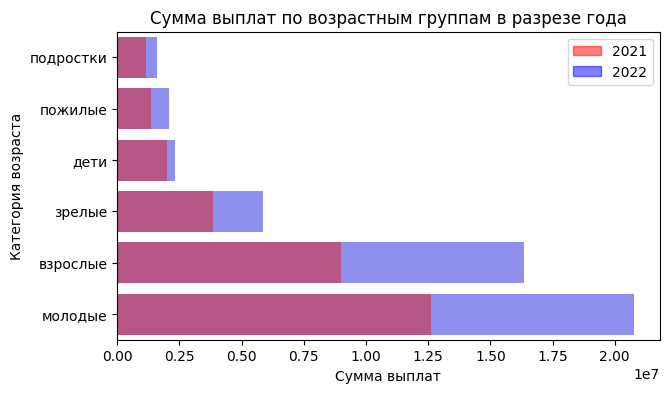

In [150]:
# график суммы выплат по возрастным группам
plt.figure(figsize=(7, 4))
ax = sns.barplot(y='age_type',x='service_amount',data = data_amount_age_2022.sort_values(by='service_amount'), 
            color='blue', alpha=0.5)
ax = sns.barplot(y='age_type',x='service_amount',data = data_amount_age_2021.sort_values(by='service_amount'), 
            color='red', alpha=0.5)

# Создаем квадраты, представляющие каждый график в легенде
legend_patches = [Patch(color='red', alpha=0.5, label='2021'), Patch(color='blue', alpha=0.5, label='2022')]

# Добавление легенды
plt.legend(handles=legend_patches)

# Заголовки и подписи осей
plt.title('Сумма выплат по возрастным группам в разрезе года')
plt.xlabel('Сумма выплат')
plt.ylabel('Категория возраста')
plt.show() 

Данные за 2022 год показывают значительно более прибыльные результаты. Молодые (22-34 года) пациенты и взрослые (34-44 года) самые многочисленные (по диаграмме возрастов) и платёжеспособные категории клиентов.

#### Распределение количества услуг по возрастным группам

In [151]:
# таблицы 2021/2022 распределения количнства услуг по возрастным группам 
data_number_age_2021 = data_2021_8.groupby('age_type').agg({'service_number':['sum']}).reset_index()
data_number_age_2021.columns = ['age_type', 'service_number']
data_number_age_2022 = data_2022.groupby('age_type').agg({'service_number':['sum']}).reset_index()
data_number_age_2022.columns = ['age_type', 'service_number']

# вывод таблицы 2021
data_number_age_2021

,age_type,service_number
0,взрослые,8134
1,дети,1763
2,зрелые,3516
3,молодые,11757
4,подростки,1084
5,пожилые,1150


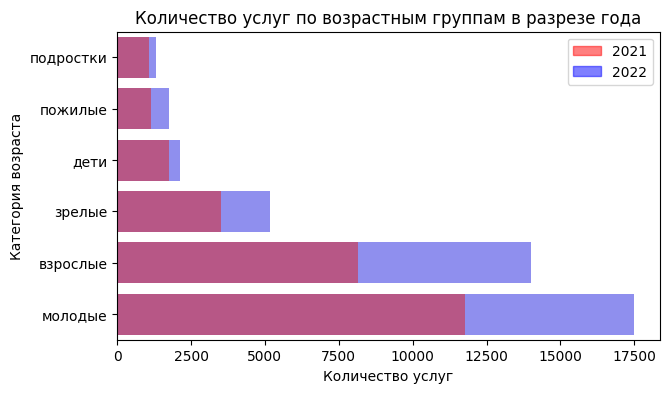

In [152]:
# график суммы выплат по возрастным группам
plt.figure(figsize=(7, 4))
ax = sns.barplot(y='age_type',x='service_number',data = data_number_age_2022.sort_values(by='service_number'), 
            color='blue', alpha=0.5)
ax = sns.barplot(y='age_type',x='service_number',data = data_number_age_2021.sort_values(by='service_number'), 
            color='red', alpha=0.5)

# Создаем квадраты, представляющие каждый график в легенде
legend_patches = [Patch(color='red', alpha=0.5, label='2021'), Patch(color='blue', alpha=0.5, label='2022')]

# Добавление легенды
plt.legend(handles=legend_patches)

# Заголовки и подписи осей
plt.title('Количество услуг по возрастным группам в разрезе года')
plt.xlabel('Количество услуг')
plt.ylabel('Категория возраста')
plt.show() 

Как и в предыдущем графике в распределении по количеству используемых услуг лидируют многочисленные группы молодых и взрослых. Наблюдается аналогичная зависимость 2022 года относительно 2021.

In [160]:
print('Количество молодых клиентов выросло на:', 
      round((1-data_2021_8.query('age_type == "молодые"')['insured'].nunique()/ \
            data_2022.query('age_type == "молодые"')['insured'].nunique())*100, 2), '%')
print('Количество взрослых клиентов выросло на:', 
      round((1-data_2021_8.query('age_type == "взрослые"')['insured'].nunique()/ \
            data_2022.query('age_type == "взрослые"')['insured'].nunique())*100, 2), '%')
print('Сумма выплат молодых клиентов увеличилась на:', 
      round((1-data_2021_8.query('age_type == "молодые"')['service_amount'].sum()/ \
            data_2022.query('age_type == "молодые"')['service_amount'].sum())*100, 2), '%')
print('Сумма выплат взрослых клиентов увеличилась на:',
      round((1-data_2021_8.query('age_type == "взрослые"')['service_amount'].sum()/ \
            data_2022.query('age_type == "взрослые"')['service_amount'].sum())*100, 2), '%')

Количество молодых клиентов выросло на: 39.72 %
Количество взрослых клиентов выросло на: 43.34 %
Сумма выплат молодых клиентов увеличилась на: 39.33 %
Сумма выплат взрослых клиентов увеличилась на: 45.05 %


<div style="border:solid blue 2px; padding: 20px">
    
**Вывод по пункту.**</br>
* Диаграмма количества клиентов относительно возраста примерно повторяет нормальное распределение. В 2022 году наблюдается увеличение количества клиентов практически по всем возрастам.
* Датафрейм категоризирован по взрастным группам. Клиенты, которым менее 10 лет - дети, 10-22 года - подростки, 23-34 - молодые, 35-44 взрослые, 45-56 - зрелые, 56-83 - пожилые. Группы клиентов молодые и взрослые оказались самыми многочисленными и выгодными посетителями клиники. 2022 год показывает рост по количеству каждой группы и по доходу от клиентов.
* Увеличение дохода клиники по многочисленным категориям пропорционально увеличению количества настоящих групп.

### 3.3. Анализ распределения услуг

#### Самые популярные услуги в 2021 и 2022 годах.

In [35]:
# группируем датафрейм по категориям услуг и ищем число встреч каждой категории, доход от услуги, количество услуг и среднюю стоимость
data_service_name_2021 = data_2021_8.groupby(['service_name']).agg({'service_amount': ['count','sum'],
                                                                               'service_number' : ['sum']}).reset_index()

# изменяем наименования колонок, добавляем среднюю стоимость
data_service_name_2021.columns = ['service_name', 'service_name_count', 'service_amount_sum', 'service_number_sum']
data_service_name_2021['average_cost'] = data_service_name_2021['service_amount_sum']/data_service_name_2021['service_number_sum']
data_service_name_2021['average_cost'] = round(data_service_name_2021['average_cost'], 2)

# сортируем
data_service_name_2021 = data_service_name_2021.sort_values(by='service_name_count', ascending=False)

# аналогично для 2022
data_service_name_2022 = data_2022.groupby(['service_name']).agg({'service_amount': ['count','sum'],
                                                                               'service_number' : ['sum']}).reset_index()
data_service_name_2022.columns = ['service_name', 'service_name_count', 'service_amount_sum', 'service_number_sum']
data_service_name_2022['average_cost'] = data_service_name_2022['service_amount_sum']/data_service_name_2022['service_number_sum']
data_service_name_2022['average_cost'] = round(data_service_name_2022['average_cost'], 2)
data_service_name_2022 = data_service_name_2022.sort_values(by='service_name_count', ascending=False)

In [36]:
# топ 10 услуг 2021
data_service_name_2021.head(10)

,service_name,service_name_count,service_amount_sum,service_number_sum,average_cost
398,Прием первичный,4478,6582945,4478,1470.06
399,Прием повторный,3295,4326335,3295,1313.00
124,Взятие крови из периферической вены,1297,206032,1304,158.00
321,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",995,689535,995,693.00
291,Магнитотерапия (1 сеанс),806,838240,806,1040.00
322,Общий анализ мочи,491,211621,491,431.00
125,Взятие мазка,396,211476,621,340.54
149,Гинекологический мазок,376,197400,376,525.00
191,Интерференционные токи (1 сеанс) (4 поля),366,380640,366,1040.00
262,Лазеротерапия (1 сеанс),344,314416,344,914.00


In [37]:
# топ 10 услуг 2022
data_service_name_2022.head(10)

,service_name,service_name_count,service_amount_sum,service_number_sum,average_cost
124,Взятие крови из периферической вены,2024,351628,2030,173.22
325,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",1517,1128850,1517,744.13
291,Магнитотерапия (1 сеанс),1449,1588620,1449,1096.36
402,"Прием гинеколога, повторный",964,1343760,964,1393.94
447,"Прием трапевта, первичный",936,1452930,936,1552.28
125,Взятие мазка,897,452082,1230,367.55
421,"Прием отоларинголога, первичный",721,1118820,721,1551.76
326,Общий анализ мочи,711,326295,711,458.92
414,"Прием невролога, первичный",690,1072920,690,1554.96
271,Лазеротерапия (1 сеанс),656,633870,656,966.27


<div style="border:solid green 2px; padding: 20px">
    
         Таблица сравнения стоимости популярных услуг в 2021 и 2022 гг.

| Наименование услуги | Количество услуг 2021| Количество услуг 2022 | Средняя цена 2021 | Средняя цена 2022|
| ----------- | ----------- | ------------ | ----- | ------- |
| Взятие крови из периферической вены    | 1297 | 2024 | 158.00   | 173.22 |
| Общий анализ крови (лейкоцитарная форм,, СОЭ) | 995 |1517 | 693.00   | 744.13 |
| Магнитотерапия (1 сеанс) |806 | 1449|  1040.00 | 1096.36 |
| Общий анализ мочи | 491 | 711| 431.00 | 458.92 |
| Взятие мазка | 396 | 897| 340.54 | 367.55 |
| Лазеротерапия (1 сеанс) | 344 | 656| 914.00 | 966.27 |

Можно налюдать увеличение количество каждой популярной услуги и увеличение среднего чека на услугу. Также клиника убрала наименование услуги первичный/повторный приём и разбира по врачам отдельно.

#### Первичный и повторный приём.

In [39]:
print('Количество услуг первичного приёма увеличилось на:', 
      round((1 - data_2021_8[data_2021_8['service_name'].str.contains('первичный')]['service_number'].sum()/ \
      data_2022[data_2022['service_name'].str.contains('первичный')]['service_number'].sum())*100, 2), '%')
print('Количество услуг повторного приёма увеличилось на:',
      round((1 - data_2021_8[data_2021_8['service_name'].str.contains('повторный')]['service_number'].sum()/ \
      data_2022[data_2022['service_name'].str.contains('повторный')]['service_number'].sum())*100, 2),'%')
print('Средняя стоимость первичного приёма возрасла на:',
      round((1 - data_2021_8[data_2021_8['service_name'].str.contains('первичный')]['service_amount'].mean()/ \
      data_2022[data_2022['service_name'].str.contains('первичный')]['service_amount'].mean())*100, 2),'%')
print('Средняя стоимость повторного приёма возрасла на:',
      round((1 - data_2021_8[data_2021_8['service_name'].str.contains('повторный')]['service_amount'].mean()/ \
      data_2022[data_2022['service_name'].str.contains('повторный')]['service_amount'].mean())*100, 2),'%')

Количество услуг первичного приёма увеличилось на: 37.51 %
Количество услуг повторного приёма увеличилось на: 35.58 %
Средняя стоимость первичного приёма возрасла на: 5.52 %
Средняя стоимость повторного приёма возрасла на: 5.79 %


Средняя стоимость первичного/повторного приёма увеличилась не сильно, но значительный рост количества предоставляемых услуг первичного/повторного приёма может дать весомый вклад в общую прибыль клиники.

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод по пункту.**</br>
* Топ-6 услуг в 2021 и 2022 году:
    * Взятие крови из периферической вены;
    * Общий анализ крови;
    * Магнитотерапия;
    * Общий анализ мочи;
    * Взятие мазка;
    * Лазеротерапия.
* Наблюдается рост количества популярных услуг и их цена.
* При переходе с 2021 года на 2022 клиника изменила структуру прайса, убрав первичный/повторный приём и добавив данные наименования у лечащих врачей.
* При анализе первичного/повторного приёма было выявлено, что произошел незначительный рост средних цен в данных категориях услуг, но заметно увеличилось количество используемых услуг.

### 3.4. Анализ по полу:

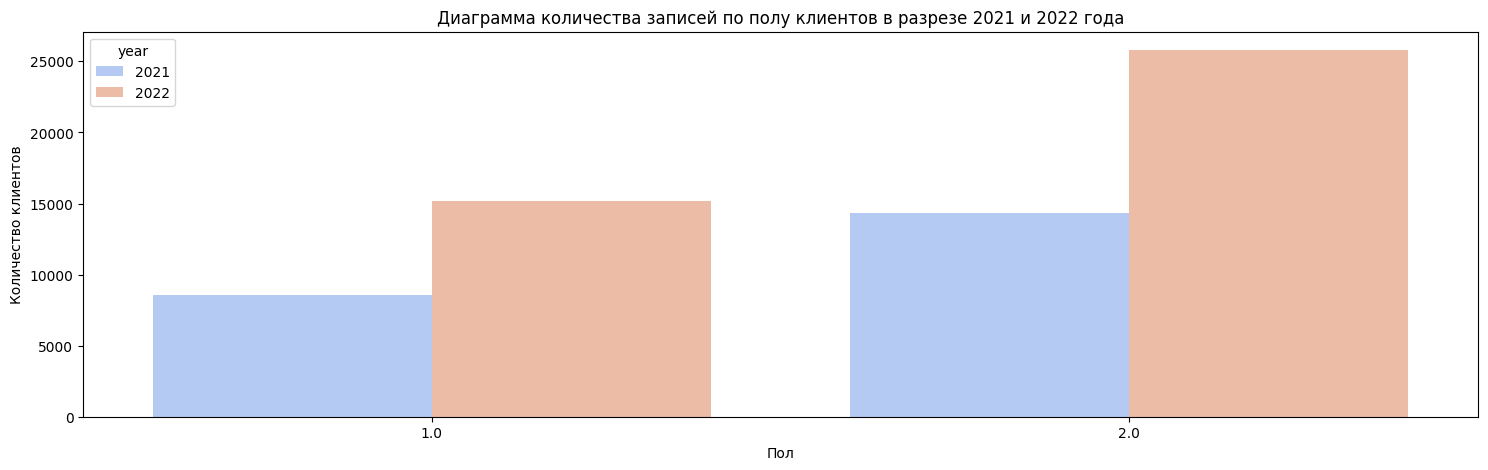

In [162]:
# описываем размер графика
plt.figure(figsize=(18, 5))

# построение графика
sns.countplot(data=data.query('year == 2021 and month < 8 or year == 2022'), x='sex_id', palette ="coolwarm", hue='year')

# заголовок и оси
plt.title('Диаграмма количества записей по полу клиентов в разрезе 2021 и 2022 года')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов');

Вероятнее всего 2 - женщины, 1 - мужчины.По данным Депздрава, мужчины в 1,5 раза реже женщин обращаются за мед помощью. Женщин в данных выборках больше, чем мужчин. Количество женщин увеличилось сильнее, чем количество мужчин.

In [41]:
# определим в каком процентном соотношении выросли группы
print('Количество мужчин выросло на',
      round((1-data_2021_8.query('sex_id == 1.0')['insured'].nunique()/data_2022.query('sex_id == 1.0')['insured'].nunique())*100, 2), '%')
print('Количество женщин выросло на',
      round((1-data_2021_8.query('sex_id == 2.0')['insured'].nunique()/data_2022.query('sex_id == 2.0')['insured'].nunique())*100, 2), '%')

Количество мужчин выросло на 37.71 %
Количество женщин выросло на 36.85 %


#### Распределение услуг и суммы выплат по полу.

In [42]:
# создаём таблицу, сгруппированную по полу и наимеванию услуг
# для каждой услуги считаем общий доход и количество использований услуги
data_sex_2021 = data_2021_8.groupby(['sex_id', 'service_name']).agg({'service_amount': ['sum'],
                                                                               'service_number' : ['sum']}).reset_index()

# переименовываем столбцы
# вводим столбец средней стоимости услуги
data_sex_2021.columns = ['sex_id', 'service_name', 'service_amount', 'service_number']
data_sex_2021['average_cost'] = data_sex_2021['service_amount']/data_sex_2021['service_number']
data_sex_2021['average_cost'] = round(data_sex_2021['average_cost'], 2)

# сортируем
data_sex_2021 = data_sex_2021.sort_values(by='service_number', ascending=False)

# аналогично для 2022 года
data_sex_2022 = data_2022.groupby(['sex_id', 'service_name']).agg({'service_amount': ['sum'],
                                                                               'service_number' : ['sum']}).reset_index()
data_sex_2022.columns = ['sex_id', 'service_name', 'service_amount', 'service_number']
data_sex_2022['average_cost'] = data_sex_2022['service_amount']/data_sex_2022['service_number']
data_sex_2022['average_cost'] = round(data_sex_2022['average_cost'], 2)

# сортируем
data_sex_2022 = data_sex_2022.sort_values(by='service_number', ascending=False)

**Женщины**

Посмотрим на популярные услуги у женщин, исключая общепопулярные услуги.

In [43]:
data_sex_2021.query('sex_id == 2.0 and \
                     service_name != "Прием первичный" and \
                     service_name != "Прием повторный" and \
                     service_name != "Общий анализ крови (лейкоцитарная форм,, СОЭ)" and \
                     service_name != "Магнитотерапия (1 сеанс)" and \
                     service_name != "Взятие крови из периферической вены" and \
                     service_name != "Общий анализ мочи" and \
                     service_name != "Взятие мазка" and \
                     service_name != "Лазеротерапия (1 сеанс)"').head(10)

,sex_id,service_name,service_amount,service_number,average_cost
535,2.0,Гинекологический мазок,197400,376,525.0
865,2.0,Ультразвуковое исследование гинекология трансв...,508200,242,2100.0
804,2.0,Рефрактометрия,166362,233,714.0
587,2.0,"Исследование соскобов с поверхн, шейки матки",183876,199,924.0
586,2.0,"Исследование соскобов с поверхн, цервикальног...",180180,195,924.0
817,2.0,Сеанс рефлексотерапии,339822,186,1827.0
833,2.0,ТТГ (тиреотропин),91120,170,536.0
571,2.0,Интерференционные токи (1 сеанс) (4 поля),166400,160,1040.0
462,2.0,АЛТ (аланинаминотрансфераза),43090,155,278.0
563,2.0,Измерение внутриглазного давления,89590,155,578.0


In [44]:
data_sex_2022.query('sex_id == 2.0 and \
                     service_name != "Прием первичный" and \
                     service_name != "Прием повторный" and \
                     service_name != "Общий анализ крови (лейкоцитарная форм,, СОЭ)" and \
                     service_name != "Магнитотерапия (1 сеанс)" and \
                     service_name != "Взятие крови из периферической вены" and \
                     service_name != "Общий анализ мочи" and \
                     service_name != "Взятие мазка" and \
                     service_name != "Лазеротерапия (1 сеанс)"') \
             .loc[~data_sex_2022['service_name'].str.contains('первичный', na=False)] \
             .loc[~data_sex_2022['service_name'].str.contains('повторный', na=False)].head(10)

,sex_id,service_name,service_amount,service_number,average_cost
619,2.0,Гинекологический мазок,344650,615,560.41
1009,2.0,Ультразвуковое исследование гинекология трансв...,1016540,454,2239.07
659,2.0,Интерференционные токи (1 сеанс) (4 поля),390830,356,1097.84
674,2.0,"Исследование соскобов с поверхн, цервикальног...",340360,349,975.24
675,2.0,"Исследование соскобов с поверхн, шейки матки",332600,341,975.37
971,2.0,ТТГ (тиреотропин),164560,290,567.45
942,2.0,Рефрактометрия,219225,287,763.85
1019,2.0,Ультразвуковое исследование щитовидной железы ...,499220,249,2004.90
957,2.0,Снятие ЭКГ (без интерпретации и описания),99040,244,405.90
656,2.0,Интерпретация ЭКГ с описанием,136180,244,558.11


<div style="border:solid green 2px; padding: 20px">
    
         Таблица сравнения стоимости услуг в 2021 и 2022 годах у женщин

| Наименование услуги | Количество услуг 2021| Количество услуг 2022 | Средняя цена 2021 | Средняя цена 2022|
| ----------- | ----------- | ------------ | ----- | ------- |
| Гинекологический мазок    | 376 | 615 | 525.00   | 560.41 |
| Ультразвуковое исследование гинекология трансв... | 242 | 454 | 2100.0   | 2239.07 |
| Исследование соскобов с поверхн, цервикальног.. |195 | 349|  924.0 | 975.24 |
| Исследование соскобов с поверхн, шейки матки | 199 | 341| 924.0 | 975.37 |
| Рефрактометрия | 233 | 287| 714.0 | 763.85 |
| ТТГ (тиреотропин) | 170 | 290| 536.0 | 567.45 |

Наблюдается увеличение частоты использования услуг и увеличение средней цены всех популярных услуг.

**Мужчины**

In [45]:
data_sex_2021.query('sex_id == 1.0 and \
                     service_name != "Прием первичный" and \
                     service_name != "Прием повторный" and \
                     service_name != "Общий анализ крови (лейкоцитарная форм,, СОЭ)" and \
                     service_name != "Магнитотерапия (1 сеанс)" and \
                     service_name != "Взятие крови из периферической вены" and \
                     service_name != "Общий анализ мочи" and \
                     service_name != "Взятие мазка" and \
                     service_name != "Лазеротерапия (1 сеанс)"').head(10)

,sex_id,service_name,service_amount,service_number,average_cost
116,1.0,Интерференционные токи (1 сеанс) (4 поля),214240,206,1040.0
307,1.0,Рефрактометрия,98532,138,714.0
313,1.0,Сеанс рефлексотерапии,232029,127,1827.0
112,1.0,Интерпретация ЭКГ с описанием,62475,119,525.0
316,1.0,Снятие ЭКГ (без интерпретации и описания),44226,117,378.0
88,1.0,Глюкоза крови,30849,113,273.0
148,1.0,Комплексная мануальная терапия,337050,107,3150.0
24,1.0,АЛТ (аланинаминотрансфераза),26410,95,278.0
157,1.0,Креатинин,22990,95,242.0
26,1.0,АСТ (аспартатаминотрансфераза),22990,95,242.0


In [46]:
data_sex_2022.query('sex_id == 1.0 and \
                     service_name != "Прием первичный" and \
                     service_name != "Прием повторный" and \
                     service_name != "Общий анализ крови (лейкоцитарная форм,, СОЭ)" and \
                     service_name != "Магнитотерапия (1 сеанс)" and \
                     service_name != "Взятие крови из периферической вены" and \
                     service_name != "Общий анализ мочи" and \
                     service_name != "Взятие мазка" and \
                     service_name != "Лазеротерапия (1 сеанс)"') \
             .loc[~data_sex_2022['service_name'].str.contains('первичный', na=False)] \
             .loc[~data_sex_2022['service_name'].str.contains('повторный', na=False)].head(10)

,sex_id,service_name,service_amount,service_number,average_cost
137,1.0,Интерференционные токи (1 сеанс) (4 поля),251290,229,1097.34
402,1.0,Снятие ЭКГ (без интерпретации и описания),73800,181,407.73
133,1.0,Интерпретация ЭКГ с описанием,100375,179,560.75
389,1.0,Рефрактометрия,126300,166,760.84
178,1.0,Комплексная мануальная терапия,495890,149,3328.12
169,1.0,Классический лечебный массаж спины,229020,149,1537.05
42,1.0,АСТ (аспартатаминотрансфераза),35250,139,253.60
40,1.0,АЛТ (аланинаминотрансфераза),40510,139,291.44
398,1.0,Сеанс рефлексотерапии,264300,137,1929.20
107,1.0,Глюкоза крови,39660,136,291.62


<div style="border:solid green 2px; padding: 20px">
    
         Таблица сравнения стоимости услуг в 2021 и 2022 годах у мужчин

| Наименование услуги | Количество услуг 2021| Количество услуг 2022 | Средняя цена 2021 | Средняя цена 2022|
| ----------- | ----------- | ------------ | ----- | ------- |
| Интерференционные токи (1 сеанс) (4 поля)   | 206 | 229 | 1040.0   | 1097.34 |
| Сеанс рефлексотерапии | 127 | 137 | 1827.0   | 1929.20 |
| Интерпретация ЭКГ с описанием |119 | 179|  525.0 | 560.75 |
| Снятие ЭКГ (без интерпретации и описания) | 117 | 181| 378.0 | 407.73 |
| Рефрактометрия | 138 | 166| 714.0 | 760.84 |
| Глюкоза крови | 113 | 136| 273.0 | 291.62 |

#### Доход по полу в год

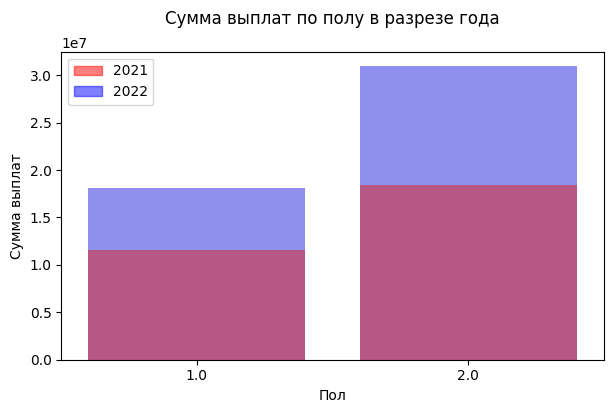

In [161]:
# график суммы выплат по возрастным группам
plt.figure(figsize=(7, 4))
ax = sns.barplot(y='service_amount',x='sex_id',data = data_2022.groupby(['sex_id']).agg({'service_amount':'sum'}).reset_index(), 
            color='blue', alpha=0.5)
ax = sns.barplot(y='service_amount',x='sex_id',data = data_2021_8.groupby(['sex_id']).agg({'service_amount':'sum'}).reset_index(), 
            color='red', alpha=0.5)

# Создаем квадраты, представляющие каждый график в легенде
legend_patches = [Patch(color='red', alpha=0.5, label='2021'), Patch(color='blue', alpha=0.5, label='2022')]

# Добавление легенды
plt.legend(handles=legend_patches)

# Заголовки и подписи осей
plt.title('Сумма выплат по полу в разрезе года', pad = 20)
plt.xlabel('Пол')
plt.ylabel('Сумма выплат');

In [48]:
print('Доход от женщин 2021:', data_2021_8.query('sex_id == 2.0')['service_amount'].sum())
print('Доход от мужчин 2021:', data_2021_8.query('sex_id == 1.0')['service_amount'].sum())
print('Доход от женщин 2022:', data_2022.query('sex_id == 2.0')['service_amount'].sum())
print('Доход от мужчин 2022:', data_2022.query('sex_id == 1.0')['service_amount'].sum())
print('Доход от женщин увеличился на:', round((1-data_2021_8.query('sex_id == 2.0')['service_amount'].sum()/ \
                                              data_2022.query('sex_id == 2.0')['service_amount'].sum())*100, 2), '%')
print('Доход от мужчин увеличился на:', round((1-data_2021_8.query('sex_id == 1.0')['service_amount'].sum()/ \
                                              data_2022.query('sex_id == 1.0')['service_amount'].sum())*100, 2), '%')
print('Доход от женщин отличается от дохода мужчин в 2021 году на:',  
      round((1-data_2021_8.query('sex_id == 1.0')['service_amount'].sum()/ \
            data_2021_8.query('sex_id == 2.0')['service_amount'].sum())*100, 2),  '%')
print('Доход от женщин отличается от дохода мужчин в 2022 году на:',  
      round((1-data_2022.query('sex_id == 1.0')['service_amount'].sum()/ \
            data_2022.query('sex_id == 2.0')['service_amount'].sum())*100, 2), '%')

Доход от женщин 2021: 18369413
Доход от мужчин 2021: 11566224
Доход от женщин 2022: 30926035
Доход от мужчин 2022: 18060627
Доход от женщин увеличился на: 40.6 %
Доход от мужчин увеличился на: 35.96 %
Доход от женщин отличается от дохода мужчин в 2021 году на: 37.04 %
Доход от женщин отличается от дохода мужчин в 2022 году на: 41.6 %


<div style="border:solid blue 2px; padding: 20px">
    
**Вывод по пункту.**</br>
* В наших данных количество пациентов женского пола преобладает над количеством пациентов мужского пола
* В 2022 году количество женщин выросло сильнее, чем количество мужчин
* Топ-6 популярных услуг для женщин:
    * Гинекологический мазок
    * Ультразвуковое исследование гинекология трансв...
    * Исследование соскобов с поверхн, цервикальног..
    * Исследование соскобов с поверхн, шейки матки
    * Рефрактометрия
    * ТТГ (тиреотропин)
* Топ-6 популярных услуг для мужчин:
    * Интерференционные токи (1 сеанс) (4 поля)
    * Сеанс рефлексотерапии
    * Интерпретация ЭКГ с описанием
    * Снятие ЭКГ (без интерпретации и описания)
    * Рефрактометрия
    * Глюкоза крови
* Для популярных услуг среди мужчин и женщин наблюдается рост в средней стоимости услуг и увеличение количества используемых услуг.
* Не смотря на то, что количество мужчин выросло сильнее на ~1%, доход от женщин вырос на 4.64% больше по сравнению с мужчинами. Можно утверждать что женщины приносят больше прибыли клинике.

### 3.5. Анализ стабильности пациентов

#### Анализ ушедших, постоянных и новых клиентов

In [49]:
# соединим таблицы data_2021 и data_2022 по столбцу insured методом inner
data_merge = data_2021.merge(data_2022, how = 'inner', left_on='insured', right_on='insured')

In [50]:
# подсчёт количества посетителей в 2021 и 2022 годах
# подсчёт количества ушедших, постоянных и новых клиентов
print('Количество уникальных посетителей:', len(set(data['insured'])))
print('Количество уникальных посетителей в 2021 году:', len(set(data_2021['insured'])))
print('Количество уникальных посетителей в 2022 году:', len(set(data_2022['insured'])))
print('Количество постоянных клиентов:', len(set(data_merge['insured'])), 
      'Процент постоянных клиентов:', round(data_merge['insured'].nunique()/data['insured'].nunique()*100, 2), '%')
print('Количество ушедших клиентов:', len(set(data_2021['insured'])) - len(set(data_merge['insured'])),
      'Процент потерянных клиентов:',
      round((len(set(data_2021['insured'])) - len(set(data_merge['insured'])))/len(set(data['insured']))*100, 2), '%')
print('Количество новых посетителей:', len(set(data_2022['insured'])) - len(set(data_merge['insured'])), 
      'Процент новых посетителей:',
     round((len(set(data_2022['insured'])) - len(set(data_merge['insured'])))/len(set(data['insured']))*100, 2), '%')

Количество уникальных посетителей: 4488
Количество уникальных посетителей в 2021 году: 2515
Количество уникальных посетителей в 2022 году: 2757
Количество постоянных клиентов: 784 Процент постоянных клиентов: 17.47 %
Количество ушедших клиентов: 1731 Процент потерянных клиентов: 38.57 %
Количество новых посетителей: 1973 Процент новых посетителей: 43.96 %


#### Ушедшие клиенты

In [51]:
# Оставим в данных 2021 года тех клиентов, которых нет в таблице 2022
data_сhurn = data_2021[~(data_2021.insured.isin(data_2022.insured.unique()))] 
print('Количество ушедших клиентов', data_сhurn['insured'].nunique())

Количество ушедших клиентов 1731


In [52]:
# топ-15 самых популярных процедур ушедших клиентов
data_сhurn['service_name'].value_counts().head(15)

Прием первичный                                  3774
Прием повторный                                  2682
Взятие крови из периферической вены              1194
Общий анализ крови (лейкоцитарная форм,, СОЭ)     905
Магнитотерапия (1 сеанс)                          815
Общий анализ мочи                                 430
Интерференционные токи (1 сеанс) (4 поля)         375
Взятие мазка                                      366
Лазеротерапия (1 сеанс)                           357
Гинекологический мазок                            320
Рефрактометрия                                    282
Сеанс рефлексотерапии                             273
Интерпретация ЭКГ с описанием                     240
Комплексная мануальная терапия                    238
Снятие ЭКГ (без интерпретации и описания)         236
Name: service_name, dtype: int64

Посещаемость по месяцам.

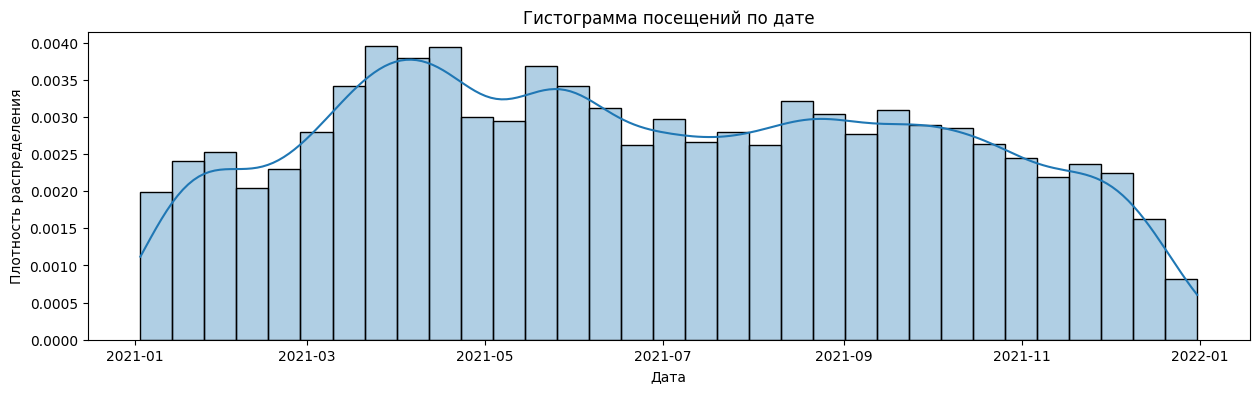

In [53]:
# построение гистограммы посещаемости по месяцам ушедших клиентов
# задаём размер
plt.figure(figsize=(15, 4))

# построение
sns.histplot(data=data_сhurn, x='service_date', palette ="coolwarm", stat='density', common_norm=False, 
             alpha=.35, kde=True)

# заголовок и оси
plt.title('Гистограмма посещений по дате')
plt.xlabel('Дата')
plt.ylabel('Плотность распределения');

Пик посещения клиники ушедшими клиентами приходится на март, апрель и июнь 2021 года. По гистограмме можно наблюдать уменьшение количества посещений к концу года.

#### Новые клиенты

In [54]:
# Создадим таблицу с новыми клиентами
# Оставим в данных 2022 года тех клиентов, которых нет в таблице 2021.
data_new = data_2022[~(data_2022.insured.isin(data_2021.insured.unique()))] 

In [55]:
# топ-15 самых популярных процедур новых клиентов
data_new['service_name'].value_counts().head(15)

Взятие крови из периферической вены              1368
Магнитотерапия (1 сеанс)                         1009
Общий анализ крови (лейкоцитарная форм,, СОЭ)    1000
Прием трапевта, первичный                         641
Прием гинеколога, повторный                       634
Взятие мазка                                      599
Общий анализ мочи                                 476
Прием невролога, первичный                        473
Лазеротерапия (1 сеанс)                           456
Прием отоларинголога, первичный                   428
Гинекологический мазок                            421
Интерференционные токи (1 сеанс) (4 поля)         401
Прием гинеколога, первичный                       388
Прием терапевта , повторный                       384
Прием офтальмолога,  первичный                    383
Name: service_name, dtype: int64

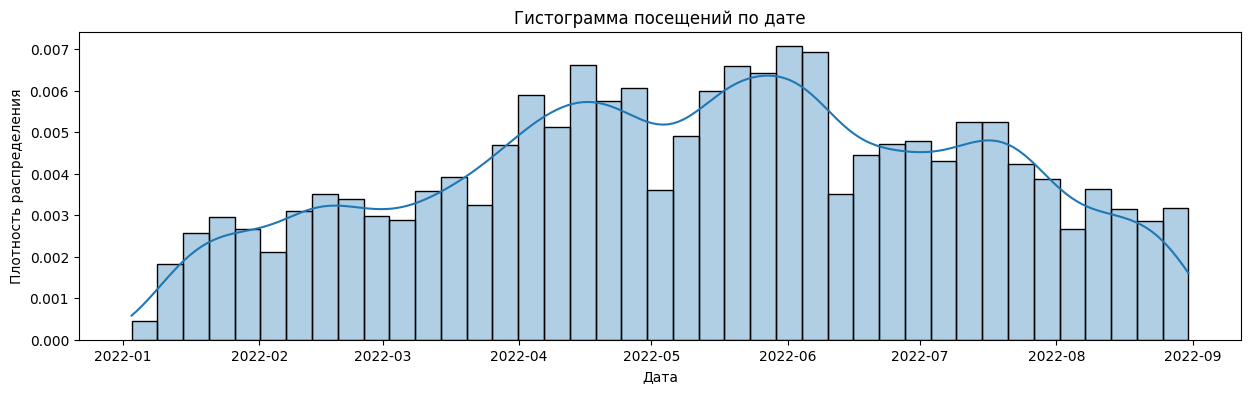

In [56]:
# размер
plt.figure(figsize=(15, 4))

# построение
sns.histplot(data=data_new, x='service_date', palette ="coolwarm", stat='density', common_norm=False, 
             alpha=.35, kde=True)

# заголовок и оси
plt.title('Гистограмма посещений по дате')
plt.xlabel('Дата')
plt.ylabel('Плотность распределения');

У новых клиентов пики посещений приходятся на апрель и июнь 2022 года.

#### Постоянные клиенты

In [57]:
# Строим таблицу, в которую будут входить использованные услуги постоянных клиентов и количество посещений в 2021 и 2022 годах.
data_regular = pd.concat([data_merge['service_name_x'].value_counts().head(40), 
           data_merge['service_name_y'].value_counts().head(40)], axis=1).reset_index()

# переименовываем столбцы
data_regular.columns = ['service_name', 'count_2021', 'count_2022']

# считаем суммарное количестов посещений за 2 года
data_regular['count'] = data_regular['count_2021'] + data_regular['count_2022']

# сортируем датафрейм по убиванию количества посещений
data_regular = data_regular.sort_values(by = 'count', ascending=False)

# топ-15 самых популярных процедур постоянных клиентов
data_regular['service_name'].head(15)

2               Взятие крови из периферической вены
3     Общий анализ крови (лейкоцитарная форм,, СОЭ)
4                          Магнитотерапия (1 сеанс)
5                                 Общий анализ мочи
6                           Лазеротерапия (1 сеанс)
10                                     Взятие мазка
8         Интерференционные токи (1 сеанс) (4 поля)
31                      Прием гинеколога, повторный
7                             Сеанс рефлексотерапии
11                           Гинекологический мазок
32                        Прием трапевта, первичный
12                   Комплексная мануальная терапия
14        Снятие ЭКГ (без интерпретации и описания)
15                    Интерпретация ЭКГ с описанием
34                      Прием терапевта , повторный
Name: service_name, dtype: object

Популярные процедуры постоянных клиентов охватывают популярные процедуры по всему датафрейму, посчитанные в пункте 3.4.

#### Сравнение ушедших и новых клиентов

In [58]:
# таблица описывает самые популярные услуги у ушедших, новых и постоянных клиентов
# count_churn - количество строк услуги у ушедших клиентов, count_new - количество строк услуги у новых, count_regular - у постоянных
data_comparison = pd.concat([data_сhurn['service_name'].value_counts().head(20), 
                     data_new['service_name'].value_counts().head(20)], axis=1).reset_index()
data_comparison.columns = ['service_name', 'count_churn', 'count_new']
data_comparison.head(10)

,service_name,count_churn,count_new
0,Прием первичный,3774.0,NaN
1,Прием повторный,2682.0,NaN
2,Взятие крови из периферической вены,1194.0,1368.0
3,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",905.0,1000.0
4,Магнитотерапия (1 сеанс),815.0,1009.0
5,Общий анализ мочи,430.0,476.0
6,Интерференционные токи (1 сеанс) (4 поля),375.0,401.0
7,Взятие мазка,366.0,599.0
8,Лазеротерапия (1 сеанс),357.0,456.0
9,Гинекологический мазок,320.0,421.0


Новые клиенты и ушедшие клиенты практически одинаковые в процентном соотношении по всему датафрейму, поэтому по данной таблице можно утверждать что новые клиенты более активные, чем ушедшие.

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод по пункту.**</br>
* Процент ушедших клиентов: 38.57%.
* Процент постоянных клиентов: 17.47%.
* Процент новых клиентов: 43.96%.
* Популярные процедуры постоянных клиентов охватывают общепопулярные процедуры.
* Новые клиенты более активные посетители клиники, чем ушедшие клиенты.
* Наблюдается сезонность посещений в марте, апреле, июне 2021 года и апреле и июне 2022 года.

### 3.6. Прибыль.

#### Стоимость по услугам

In [59]:
# соедимим таблицы data_2021_8 и data_2022 по наименованию услуг
table_merge = data_2021_8.merge(data_2022, how = 'inner', left_on='service_name', right_on='service_name')
table_merge.head(2)

,record_id_x,service_date_x,service_name,service_amount_x,service_number_x,insured_x,sex_id_x,age_for_service_date_x,year_x,month_x,...,record_id_y,service_date_y,service_amount_y,service_number_y,insured_y,sex_id_y,age_for_service_date_y,year_y,month_y,age_type_y
0,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26,2021,1,...,31996300203,2022-01-11,300,1,774352,2.0,28,2022,1,молодые
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26,2021,1,...,31996506903,2022-01-23,300,1,160072,2.0,24,2022,1,молодые


In [60]:
# оставим только те услуги, у которых разная стоимость и удалим дубликаты
data_amount = table_merge.query('service_amount_x != service_amount_y') \
[['service_name', 'service_amount_x', 'service_amount_y']].drop_duplicates()
data_amount.head(2)

,service_name,service_amount_x,service_amount_y
0,"Взятие материала на посев, цитологическое иссл...",284,300
14,"Взятие материала на посев, цитологическое иссл...",284,600


In [61]:
# подсчёт услуг, которые подорожали и услуг, которые упали в цене
print('Количество услуг, которые выросли в цене:', 
       len(data_amount.drop_duplicates(['service_name']).query('service_amount_x < service_amount_y')))
print('Количество услуг, которые упали в цене:',      
       len(data_amount.drop_duplicates(['service_name']).query('service_amount_x > service_amount_y')))

Количество услуг, которые выросли в цене: 433
Количество услуг, которые упали в цене: 6


Практически все услуги выросли в цене. В пункте 3.3. мы также обнаружили, что первичный и повторный приёмы выросли в цене на 5.52% и 5.79% соответственно.

#### Общая прибыль

In [62]:
print('Выручка за 8 месяцев 2021 года:', data_2021_8['service_amount'].sum())
print('Выручка за 8 месяцев 2022 года:', data_2022['service_amount'].sum())
print('На сколько возросла выручка:', data_2022['service_amount'].sum() - data_2021_8['service_amount'].sum())

Выручка за 8 месяцев 2021 года: 29957552
Выручка за 8 месяцев 2022 года: 48986662
На сколько возросла выручка: 19029110


Суммарная выручка за 8 месяцев 2021 года ~ 30млн. Суммарная выручка за 2022 год ~ 49млн. Суммарная выручка возросла на 19млн.

#### Чек одного клиента по годам

In [63]:
# Соберем сводную таблицу, которая будет отражать какую прибыть принёс каждый клиент за новый период 2021 года.
pivot_2021 = data_2021_8.pivot_table(
            index=['insured'],\
            values=['service_amount'],\
            aggfunc=['sum']\
).reset_index()
pivot_2021.head(2)

,insured,sum
,,service_amount
0,125073,9274
1,125094,4479


,service_amount
count,1733.000000
mean,17286.527409
std,22271.874478
min,788.000000
25%,3476.000000
50%,9188.000000
75%,22021.000000
max,250861.000000


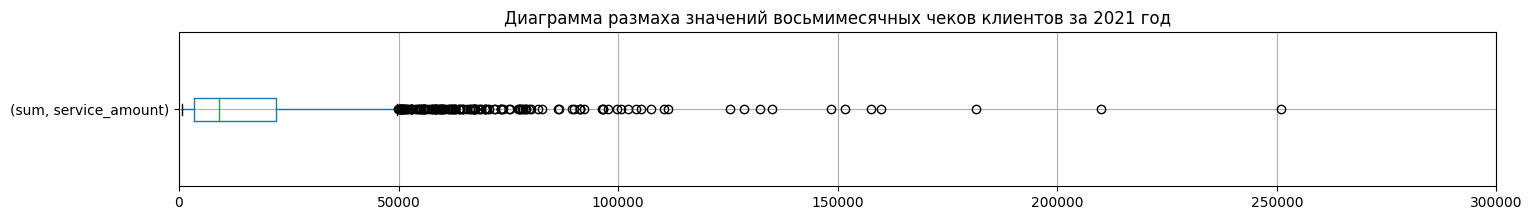

In [64]:
# Построим диаграмму размаха значений восьмимесячных чеков клиентов за 2021 год.
fig, ax = plt.subplots(figsize = (17,2))
ax = pivot_2021[['sum']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений восьмимесячных чеков клиентов за 2021 год')
ax.set_xlim(0, 300000);
pivot_2021['sum'].describe()

In [65]:
# Аналогичная таблица для 2022 года.
pivot_2022 = data_2022.pivot_table(
            index=['insured'],\
            values=['service_amount'],\
            aggfunc=['sum']\
).reset_index()
pivot_2022.head(2)

,insured,sum
,,service_amount
0,125094,6380
1,142438,8630


,service_amount
count,2757.000000
mean,17768.103736
std,22186.781436
min,360.000000
25%,4032.000000
50%,9730.000000
75%,23300.000000
max,243080.000000


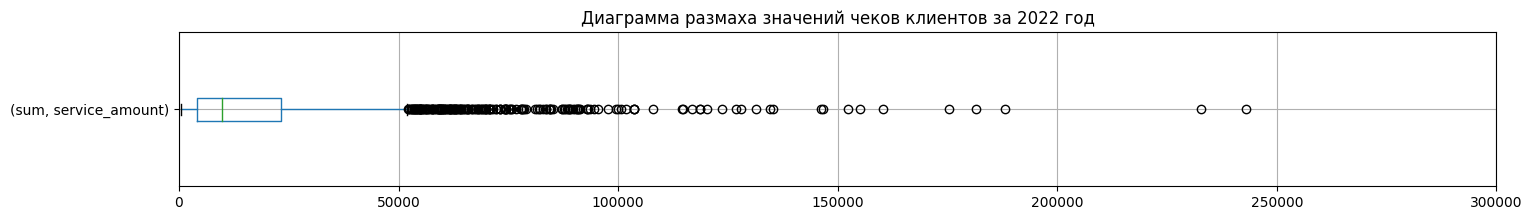

In [66]:
# диаграмма размаха значений восьмимесячных чеков клиентов за 2022 год
fig, ax = plt.subplots(figsize = (17,2))
ax = pivot_2022[['sum']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений чеков клиентов за 2022 год')
ax.set_xlim(0, 300000);
pivot_2022['sum'].describe()

In [164]:
# Строим две таблички со статистическими характеристиками рядом.
stat_table = pd.concat([pivot_2021['sum'].describe().round(2), pivot_2022['sum'].describe().round(2)], axis=1)
stat_table

,service_amount,service_amount
count,1733.00,2757.00
mean,17286.53,17768.10
std,22271.87,22186.78
min,788.00,360.00
25%,3476.00,4032.00
50%,9188.00,9730.00
75%,22021.00,23300.00
max,250861.00,243080.00


<div style="border:solid blue 2px; padding: 20px">
    
**Вывод по пункту.**</br>
* 433 услуги подорожали, 6 услуг упали в цене.
* Максимальная сумма, которую принёс клиент за 8 месяцев каждого года упала с 250тыс. до 243тыс. руб.
* Среднее вырасло с 17,3тыс. до 17,8тыс. руб.
* Медиана выросла с 9,2тыс. до 9,7тыс. руб.
* Минимальная сумма упала на 428 руб.

### 3.7. Анализ по лечениям.

#### Подсчёт количества лечений у пациентов.

Будем считать, что **лечение** - это последовательность мед услуг, полученных клиентом, интервал между которыми не более 14 дней.

Для анализа датафрейма по лечениям и создания столбца, который будет отображать количество лечений у каждого клиента, используем следующий подход:

1. Отсортируем датафрейм по столбцам "insured" и "service_date" в возрастающем порядке, чтобы данные для каждого пациента были сгруппированы и отсортированы по дате оказания услуги.

2. Создадим новый столбец "treatment_id" для идентификации каждого лечения. Значение "treatment_id" будет увеличиваться на 1 каждый раз, когда проходит более 14 дней с предыдущего лечения.

3. Используя метод группировки и агрегации данных, создадим таблицу df_results, в которой будут храниться количество лечений для каждого клиента и суммарная цена его лечения.

In [68]:
# Сортировка данных по insured и service_date
df_sorted = data.sort_values(by=['insured', 'service_date'])

# Создание столбца treatment_id для идентификации лечений
df_sorted['treatment_id'] = ((df_sorted['service_date'] - df_sorted.groupby('insured')['service_date'].shift()).dt.days > 14).cumsum()

# Группировка данных и подсчет количества лечений
df_results = df_sorted.groupby(['insured']).agg({'treatment_id': 'nunique', 'service_amount' : 'sum'}).reset_index()

df_results.head()

,insured,treatment_id,service_amount
0,125073,3,33080
1,125094,4,27519
2,125404,1,1470
3,139315,1,3300
4,139539,1,75239


#### Подсчёт количества лечений у пациентов в датафреймах data_2021_8 и data_2022

In [69]:
# Сортировка данных по insured и service_date
df_sorted_for_2021 = data_2021_8.sort_values(by=['insured', 'service_date'])

# Создание столбца treatment_id для идентификации лечений
df_sorted_for_2021['treatment_id'] = ((df_sorted_for_2021['service_date'] - \
                                       df_sorted_for_2021.groupby('insured')['service_date'].shift()).dt.days > 14).cumsum()

# Группировка данных и подсчет количества лечений
df_results_for_2021 = df_sorted_for_2021.groupby(['insured']).agg({'treatment_id': 'nunique', 'service_amount' : 'sum'}).reset_index()
df_results_for_2021.head(2)

,insured,treatment_id,service_amount
0,125073,1,9274
1,125094,1,4479


In [70]:
# Сортировка данных по insured и service_date
df_sorted_for_2022 = data_2022.sort_values(by=['insured', 'service_date'])

# Создание столбца treatment_id для идентификации лечений
df_sorted_for_2022['treatment_id'] = ((df_sorted_for_2022['service_date'] - \
                                       df_sorted_for_2022.groupby('insured')['service_date'].shift()).dt.days > 14).cumsum()

# Группировка данных и подсчет количества лечений
df_results_for_2022 = df_sorted_for_2022.groupby(['insured']).agg({'treatment_id': 'nunique', 'service_amount' : 'sum'}).reset_index()
df_results_for_2022.head(2)

,insured,treatment_id,service_amount
0,125094,1,6380
1,142438,1,8630


Построим график числа клиентов по количеству лечений в разрезе года.

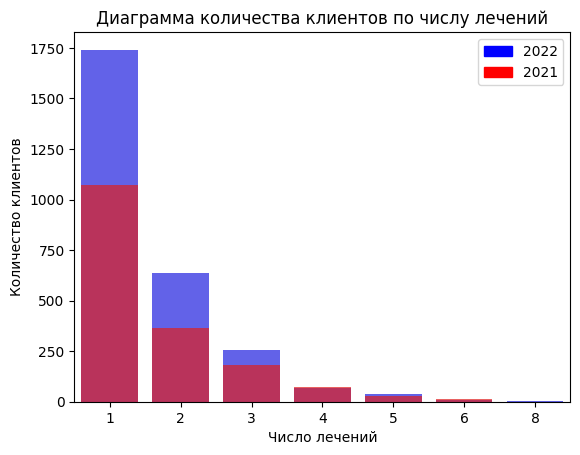

In [71]:
# введём датафреймы для графика
data1 = df_results_for_2021['treatment_id']
data2 = df_results_for_2022['treatment_id']

# Построение первого графика
graph1 = sns.barplot(x=data2.value_counts().index, y=data2.value_counts(), color='blue', alpha=0.7)

# Построение второго графика поверх первого
graph2 = sns.barplot(x=data1.value_counts().index, y=data1.value_counts(), color='red', alpha=0.7)

# Создаем квадраты, представляющие каждый график в легенде
legend_patches = [Patch(color='blue', label='2022'), Patch(color='red', label='2021')]

# Добавление легенды
plt.legend(handles=legend_patches)

# Подпись осей и заголовок
plt.title('Диаграмма количества клиентов по числу лечений')
plt.xlabel('Число лечений')
plt.ylabel('Количество клиентов')

# Отображение графиков
plt.show()

In [72]:
# количество лучений в 2021 году 
data1.value_counts()

1    1072
2     366
3     180
4      75
5      27
6      12
8       1
Name: treatment_id, dtype: int64

In [73]:
# количество лучений в 2022 году
data2.value_counts()

1    1741
2     638
3     257
4      70
5      39
6       9
7       3
Name: treatment_id, dtype: int64

Значительно выросло число клиентов, которые прошли 1 или 2 лечения в клинике. В 2021 году отсутствуют клиенты, которые прошли 7 лечений, в 2022 - 8 лечений.

#### Доход клиники по количеству лечений

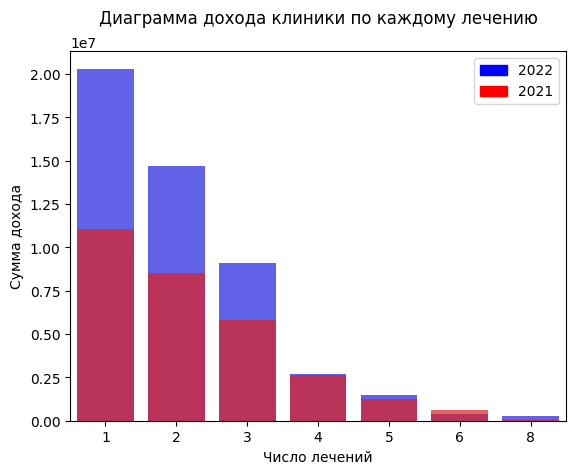

In [74]:
# вводим новые таблицы для графика
df_1 = df_results_for_2021.groupby(['treatment_id']).agg({'service_amount':'sum'}).reset_index()
df_2 = df_results_for_2022.groupby(['treatment_id']).agg({'service_amount':'sum'}).reset_index()

# построение графиков
ax = sns.barplot(x='treatment_id', y='service_amount', data = df_2, color='blue', alpha=0.7)
ax = sns.barplot(x='treatment_id', y='service_amount', data = df_1, color='red', alpha=0.7)

# Создаем квадраты, представляющие каждый график в легенде
legend_patches = [Patch(color='blue', label='2022'), Patch(color='red', label='2021')]

# Добавление легенды
plt.legend(handles=legend_patches)

# Подпись осей и заголовок
plt.title('Диаграмма дохода клиники по каждому лечению', pad=20)
plt.xlabel('Число лечений')
plt.ylabel('Сумма дохода');

In [75]:
print('Количество 1 лечения выросло на', 
                 round((1-df_results_for_2021.query('treatment_id == 1')['insured'].nunique()/ \
                 df_results_for_2022.query('treatment_id == 1')['insured'].nunique())*100, 2), '%')
print('Доход по 1 лечению вырос на',
                 round((1-df_results_for_2021.query('treatment_id == 1')['service_amount'].sum()/ \
                 df_results_for_2022.query('treatment_id == 1')['service_amount'].sum())*100, 2), '%')
print('Количество 2 лечений выросло на',
                 round((1-df_results_for_2021.query('treatment_id == 2')['insured'].nunique()/ \
                 df_results_for_2022.query('treatment_id == 2')['insured'].nunique())*100, 2), '%')
print('Доход по 2 лечениям вырос на', 
                 round((1-df_results_for_2021.query('treatment_id == 2')['service_amount'].sum()/ \
                 df_results_for_2022.query('treatment_id == 2')['service_amount'].sum())*100, 2), '%')
print('Количество 3 лечений выросло на',
                 round((1-df_results_for_2021.query('treatment_id == 3')['insured'].nunique()/ \
                 df_results_for_2022.query('treatment_id == 3')['insured'].nunique())*100, 2), '%')
print('Доход по 3 лечениям вырос на',
                 round((1-df_results_for_2021.query('treatment_id == 3')['service_amount'].sum()/ \
                 df_results_for_2022.query('treatment_id == 3')['service_amount'].sum())*100, 2), '%')

Количество 1 лечения выросло на 38.43 %
Доход по 1 лечению вырос на 45.44 %
Количество 2 лечений выросло на 42.63 %
Доход по 2 лечениям вырос на 42.16 %
Количество 3 лечений выросло на 29.96 %
Доход по 3 лечениям вырос на 36.33 %


<div style="border:solid blue 2px; padding: 20px">
    
**Вывод по пункту.**</br>
* Большинство клиентов проходят в клинике 1 лечение.
* В 2022 году значительно выросло количество клиентов, которые прошли 1 или 2 лечения.
* Доход клиники в 2022 году вырос по 1, 2 и 3 лечениям.
* По результатам подсчётов доход клиники по процентам растёт сильнее, чем количество лечений в каждом наборе, причём значительный рост приходится на 1 и 3 лечений.

## 4. Проверка гипотез.<a id='section_id_4'></a>

### 4.1. Подорожание услуг. 

* Н<sub>0</sub>: Средний доход клиники в 2021 году равен среднему доходу клиники в 2022 году.</br>
* Н<sub>1</sub>: Средний доход клиники в 2021 году не равен среднему доходу клиники в 2022 году.

In [106]:
# проверка различий в доходе клиники до и после подорожания услуг
p_value = stats.ttest_ind(data_2021['service_amount'], data_2022['service_amount'])[1]
alpha = 0.05

if p_value < alpha:
    conclusion = "Отвергаем нулевую гипотезу."
else:
    conclusion = "Не получилось отвергнуть нулевую гипотезу."

# Вывод результатов
print(f"P-value: {p_value}")
print(conclusion)

P-value: 5.607697813297757e-25
Отвергаем нулевую гипотезу.


<div style="border:solid green 2px; padding: 20px">

Наши данные показывают очень маловероятные результаты, поэтому они могут не противоречить альтернативной гипотезе Н<sub>1</sub>. Подорожание услуг является одной из причин изменения дохода клиники.

### 4.2. Возраст и количество используемых услуг.

* Н<sub>0</sub>: Возраст клиентов имеет влияние на количество используемых услуг.</br>
* Н<sub>1</sub>: Возраст клиентов не имеет влияния на количество используемых услуг.

In [94]:
# создадим таблицу по уникальному идентификатору клиента, возрасту и количеству услуг за всё время
data_number_of_visitors = data.groupby('insured').agg({'service_number':'sum', 'age_for_service_date':'mean'}).reset_index()
data_number_of_visitors.head(2)

,insured,service_number,age_for_service_date
0,125073,27,65.740741
1,125094,20,43.789474


In [100]:
# рассчитаем корреляцию и проведём корреляционный тест
correlation = data['age_for_service_date'].corr(data['service_number'])
p_value = stats.pearsonr(data_number_of_visitors['age_for_service_date'], data_number_of_visitors['service_number'])[1]
alpha = 0.05

if p_value < alpha:
    conclusion = "Гипотеза подтверждена: возраст посетителей оказывает статистически значимое влияние на количество услуг."
else:
    conclusion = "Гипотеза не подтверждена: возраст посетителей не оказывает статистически значимого влияния на количество услуг."

# Вывод результатов
print(f"Коэффициент корреляции: {correlation}")
print(f"P-value: {p_value}")
print(conclusion)

Коэффициент корреляции: 0.008707663667795849
P-value: 4.4016873953319246e-18
Гипотеза подтверждена: возраст посетителей оказывает статистически значимое влияние на количество услуг.


<div style="border:solid green 2px; padding: 20px">
Наши данные не противоречат нулевой гипотезе. Увеличение количества посетителей сегмента 22-45 лет даёт вклад в рост дохода в 2022 году.

### 4.3. Количество лечений на пациента.

* Н<sub>0</sub>: Связи между количеством лечений и доходом клиники нет.</br>
* Н<sub>1</sub>: Есть связь между количеством лечений и доходом клиники.

In [117]:
# Получить сумму оплаты и количество лечений для каждого пациента
service_amount_2021 = df_results_for_2021['service_amount']
treatment_count_2021 = df_results_for_2021['treatment_id']

service_amount_2022 = df_results_for_2022['service_amount']
treatment_count_2022 = df_results_for_2022['treatment_id']

# Вычислить ранговый коэффициент корреляции Спирмена
correlation, p_value = spearmanr(service_amount_2021, treatment_count_2021)
correlation2, p_value2 = spearmanr(service_amount_2022, treatment_count_2022)

# Вывести результаты
print("Ранговый коэффициент корреляции Спирмена для 2021 года: ", correlation)
print("p-value для 2021 года: ", p_value)
print("Ранговый коэффициент корреляции Спирмена для 2022 года: ", correlation2)
print("p-value для 2022 года: ", p_value2)

Ранговый коэффициент корреляции Спирмена для 2021 года:  0.5506090672937817
p-value для 2021 года:  5.853356836080926e-138
Ранговый коэффициент корреляции Спирмена для 2022 года:  0.51726786518626
p-value для 2022 года:  1.535541733992347e-188


<div style="border:solid green 2px; padding: 20px">
Можно утверждать что существует статистически заметная связь между количеством лечений и доходом клиники.

## 5. Общий вывод.<a id='section_id_5'></a>

По данным медицинского центра нам было необходимо провести анализ изменения цены лечения в клинике в 2022 году относительно 2021 года и определить ключевые драйверы изменения цены лечения.</br>

**Исследовательский анализ.**</br>

*Посещения*</br>

* В 2022 году увеличилось количество записей в таблице, увеличилось количество уникальных клиентов в день, вырос дневной чек клиники.
* Принято решение ограничить данные 2021 года до августа включительно.
Возраст.
* Датафрейм категоризирован по возрасту. Молодые  (22-34 года) и взрослые (34-44 года) клиенты - самые активные и платежеспособные.
      * 2022 год показывает рост по количеству молодых клиентов на 39,72% и взрослых на 43,34 %.
      * Увеличилась сумма выплат на 39,33 % относительно молодых клиентов и на 45,05 % относительно взрослых.                                                                                                                                                                             *Пол.*</br>
      
* Количество мужчин выросло на 37.71 %. Количество женщин выросло на 36.85 %.
* Доход от женщин увеличился на: 40.6 %. Доход от мужчин увеличился на: 35.96 %.
* Не смотря на то, что количество мужчин выросло сильнее на ~1%, доход от женщин вырос на 4.64% больше по сравнению с мужчинами. Можно утверждать что женщины приносят больше прибыли клинике. (Драйвер)

*Распределение услуг.*
* Топ услуг по всем категориям: Взятие крови из периферической вены; Общий анализ крови; Магнитотерапия; Общий анализ мочи; Взятие мазка; Лазеротерапия.
* Наблюдается рост количества популярных услуг и их цена.
* При переходе с 2021 года на 2022 клиника изменила структуру прайса, убрав первичный/повторный приём и добавив данные наименования у лечащих врачей.
* Рост по количеству первичного и повторного приёма 37.51 % и 35.58 % соответственно. Рост по стоимости первичного/повторного приёма 5.52 % и 5.79 % соответственно.

*Анализ стабильности пациентов.*

* Процент ушедших клиентов: 38.57%. Процент постоянных клиентов: 17.47%. Процент новых клиентов: 43.96%.
* Новые клиенты более активные посетители клиники, чем ушедшие клиенты.
* Наблюдается сезонность посещений в марте, апреле, июне 2021 года и апреле и июне 2022 года.
  
*Анализ прибыли.*

* 433 услуги подорожали, 6 услуг упали в цене.
* Максимальная сумма, которую принёс клиент за 8 месяцев каждого года упала с 250тыс. до 243тыс. руб.
* Среднее вырасло с 17,3тыс. до 17,8тыс. руб. Медиана выросла с 9,2тыс. до 9,7тыс. руб. Минимальная сумма упала на 428 руб.
  
*Анализ по лечениям.*

* Большинство клиентов проходят в клинике 1 лечение.
* В 2022 году значительно выросло количество клиентов, которые прошли 1 или 2 лечения. Доход клиники в 2022 году вырос по 1, 2 и 3 лечениям.
* По результатам подсчётов доход клиники по процентам растёт сильнее, чем количество лечений в каждом наборе, причём значительный рост приходится на 1 и 3 лечений.

**Гипотезы**
* Подорожание услуг является одной из причин изменения дохода клиники.
* Увеличение количества посетителей сегмента 22-45 лет даёт вклад в рост дохода в 2022 году.
* Можно утверждать что существует статистически заметная связь между количеством лечений и доходом клиники.

**Драйверы изменения дохода клиники**
*  Значительный рост количества клиентов и посещаемости. Новые клиенты более активные, чем ушедшие посетители.
* Увеличение количества женщин. Женщины более прибыльная категория клиентов.
* Подорожание услуг в клинике.
* Увеличение количества платежеспособных сегментов (молодые и взрослые) что, как следствие, показывает увеличение используемых услуг на посетителя и, следовательно, рост прибыли.
* Связь между количеством лечений и доходом клиники. Стоит обратить внимание на категории клиентов, которые проходят 1 или 3 лечения за 8 месяцев.
